# Final Project Submission: Forest Cover Type Classifier

Please fill out:
* Student name: **Kevin McPherson**
* Student pace: self paced / **part time** / full time
* Scheduled project review date/time: **Monday, March 30, 2020, 9:30AM**
* Instructor name: **Abhineet Kulkarni**
* Blog post URL:


## The Data

The data for this project was supplied from the University of California, Irvine's Machine Learning Repository.

The data is a collection of cartographic features of 30 x 30 square meter forest patches in the Roosevelt National
Forest in Northern Colorado. 

The objective for this data is simple: Are we able to classify forest cover (i.e., tree) type based on this cartographic data

## Step 1: Load and Describe the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

The dataset originally comes from 

In [2]:
cover = pd.read_csv('covtype.csv') # read in data

In [3]:
print('Data Dimensions:')
print('Number of Records:', cover.shape[0])
print('Number of Features:', cover.shape[1])  # print shape

Data Dimensions:
Number of Records: 581012
Number of Features: 55


In [4]:
print('Feature Names:') # print feature names
print(cover.columns)

Feature Names:
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39

In [5]:
print(cover.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

In [6]:
pd.set_option('display.max_columns', 999)

Looking over the data, we can tell that there is a good mix of geographical features about the forest samples, even if the target variable types are not well represented.

For instance, look at the range in horizontal distance to roadways.

In [7]:
cover.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [8]:
cover.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [9]:
print('Skewness of the below features:')
print(cover.skew())

Skewness of the below features:
Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                           

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

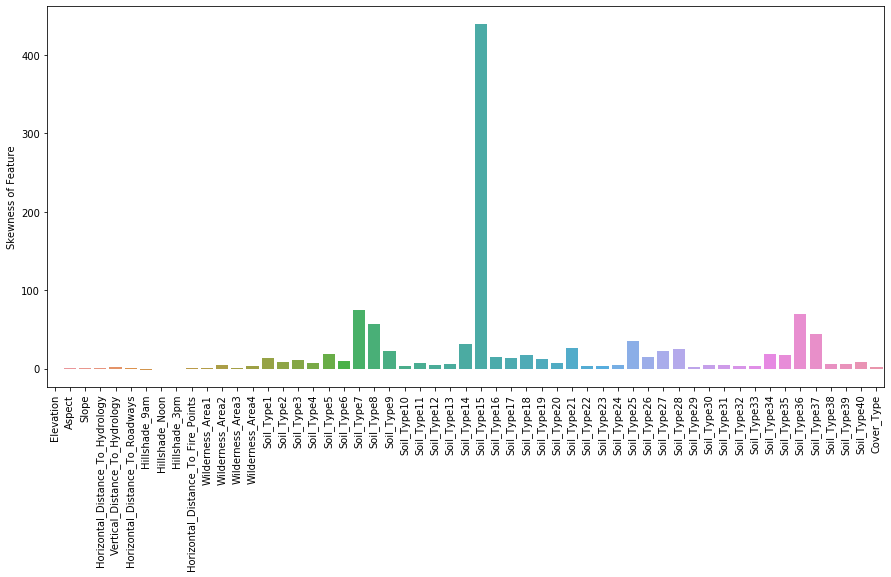

In [10]:
skew = cover.skew()
skew_df = pd.DataFrame(skew,index=None,columns=['Skewness of Feature'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index, y = 'Skewness of Feature',data= skew_df)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Cover Type Raw Sum in Roosevelt National Forest')

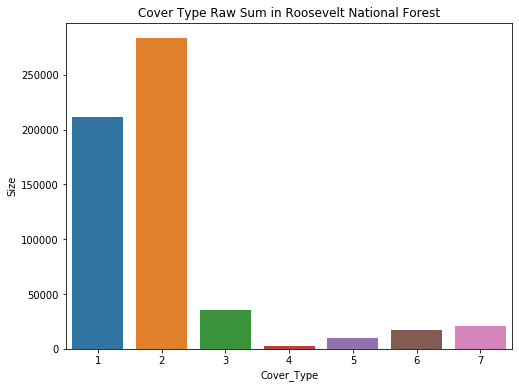

In [11]:
class_dist = cover.groupby('Cover_Type').size()
class_label = pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x = class_label.index,y = 'Size', data = class_label)
plt.title('Cover Type Raw Sum in Roosevelt National Forest')

In [12]:
for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Cover_Type',class_dist.index[i], ':', '%.2f'% percent, '% of the data.')

Cover_Type 1 : 36.46 % of the data.
Cover_Type 2 : 48.76 % of the data.
Cover_Type 3 : 6.15 % of the data.
Cover_Type 4 : 0.47 % of the data.
Cover_Type 5 : 1.63 % of the data.
Cover_Type 6 : 2.99 % of the data.
Cover_Type 7 : 3.53 % of the data.


In [13]:
cont_data=cover.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
binary_data=cover.loc[:,'Wilderness_Area1':'Soil_Type40']
Wilderness_data=cover.loc[:,'Wilderness_Area1': 'Wilderness_Area4']
Soil_data=cover.loc[:,'Soil_Type1':'Soil_Type40']

In [14]:
for col in binary_data:
    count=binary_data[col].value_counts()
    print(col,count)

Wilderness_Area1 0    320216
1    260796
Name: Wilderness_Area1, dtype: int64
Wilderness_Area2 0    551128
1     29884
Name: Wilderness_Area2, dtype: int64
Wilderness_Area3 0    327648
1    253364
Name: Wilderness_Area3, dtype: int64
Wilderness_Area4 0    544044
1     36968
Name: Wilderness_Area4, dtype: int64
Soil_Type1 0    577981
1      3031
Name: Soil_Type1, dtype: int64
Soil_Type2 0    573487
1      7525
Name: Soil_Type2, dtype: int64
Soil_Type3 0    576189
1      4823
Name: Soil_Type3, dtype: int64
Soil_Type4 0    568616
1     12396
Name: Soil_Type4, dtype: int64
Soil_Type5 0    579415
1      1597
Name: Soil_Type5, dtype: int64
Soil_Type6 0    574437
1      6575
Name: Soil_Type6, dtype: int64
Soil_Type7 0    580907
1       105
Name: Soil_Type7, dtype: int64
Soil_Type8 0    580833
1       179
Name: Soil_Type8, dtype: int64
Soil_Type9 0    579865
1      1147
Name: Soil_Type9, dtype: int64
Soil_Type10 0    548378
1     32634
Name: Soil_Type10, dtype: int64
Soil_Type11 0    568602
1 

## Steps 2 and 3: Exploratory Data Analysis and Feature Engineering

### Exploring the Data

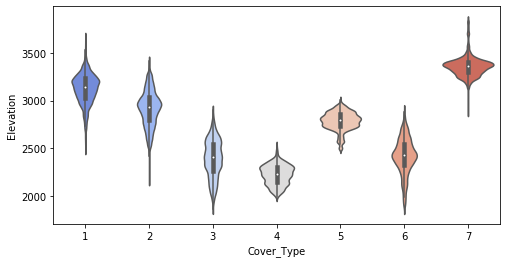

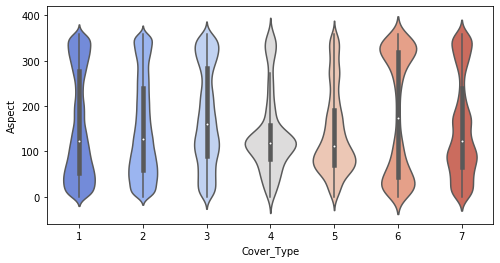

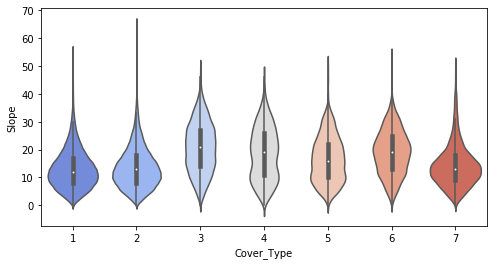

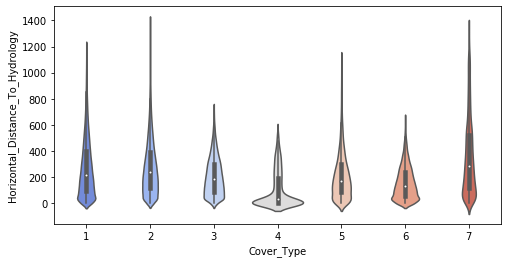

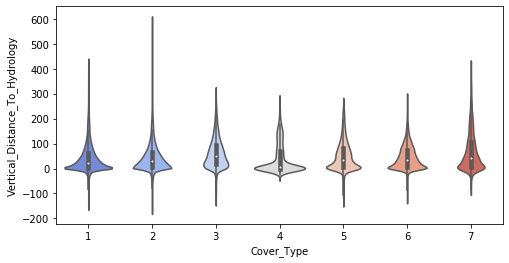

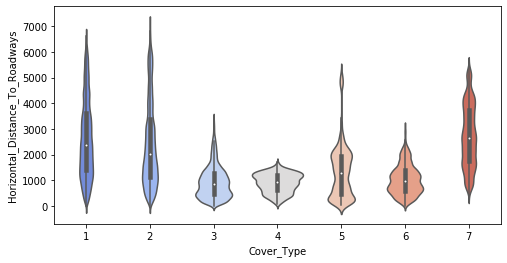

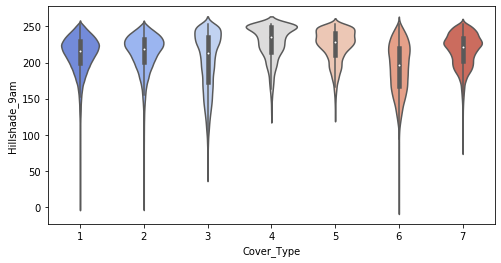

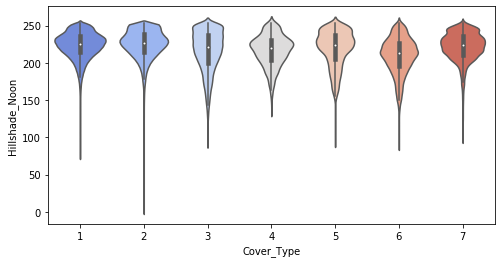

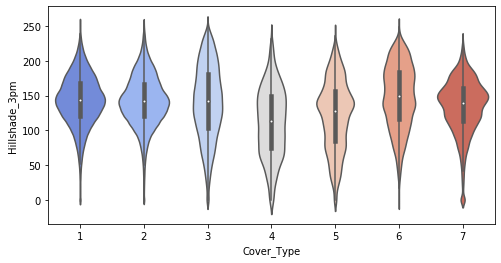

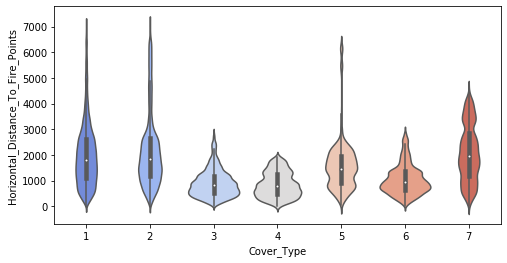

In [15]:
cover['Cover_Type']=cover['Cover_Type'].astype('category')

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.violinplot(x=cover['Cover_Type'], y=col, data=cover, palette="coolwarm")

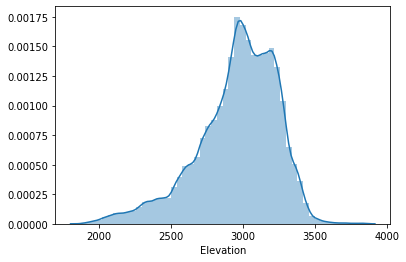

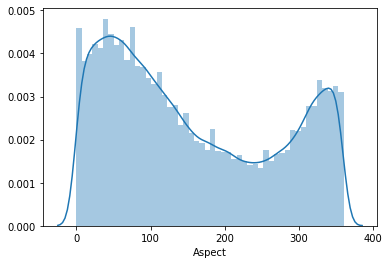

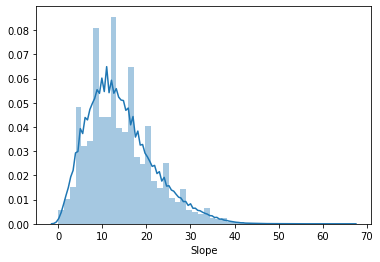

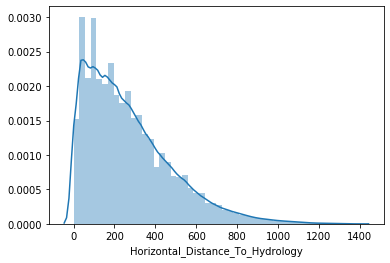

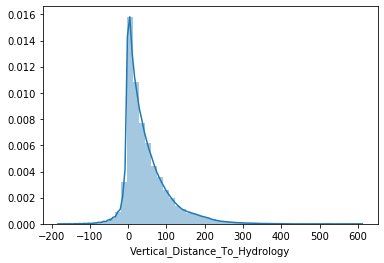

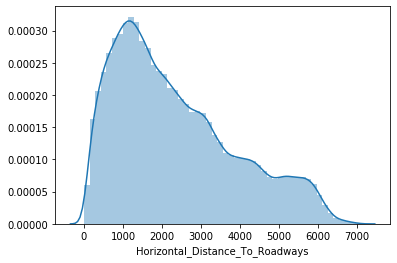

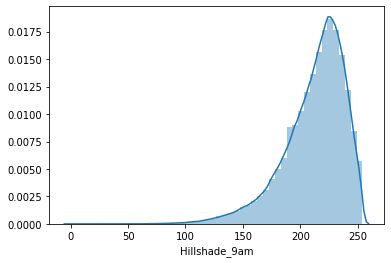

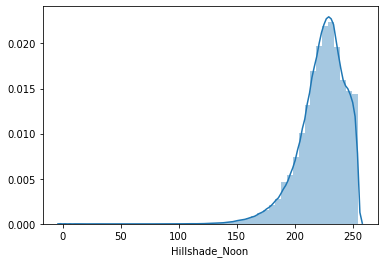

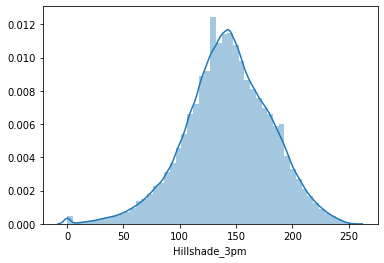

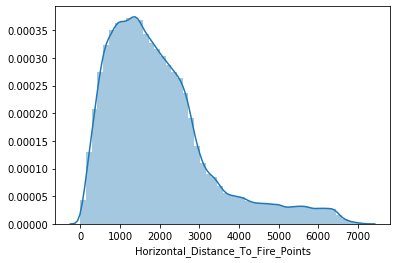

In [16]:
for i, col in enumerate(cont_data.columns):
    plt.figure(i)
    sns.distplot(cont_data[col])

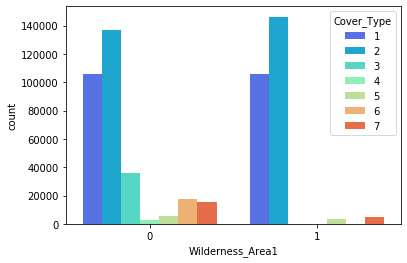

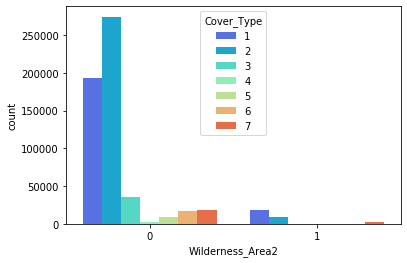

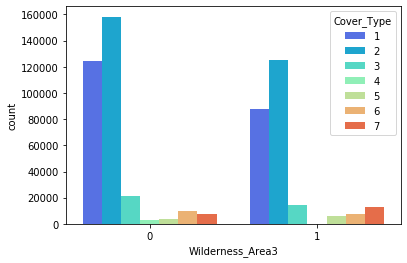

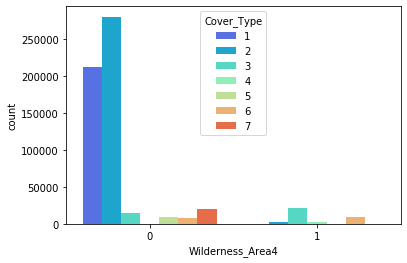

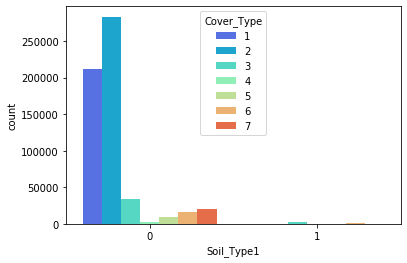

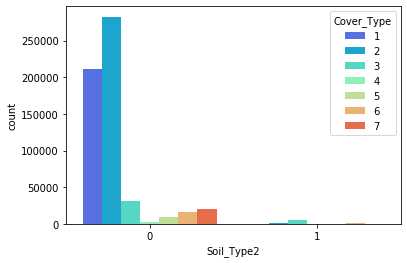

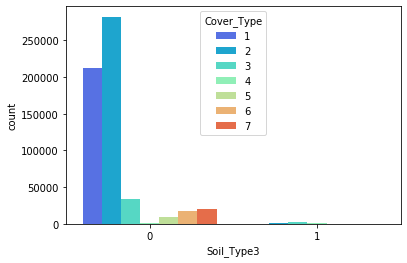

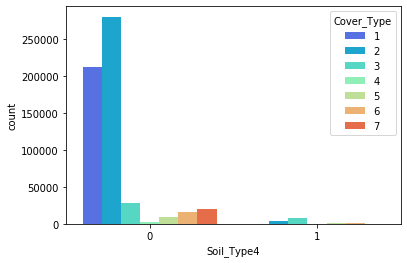

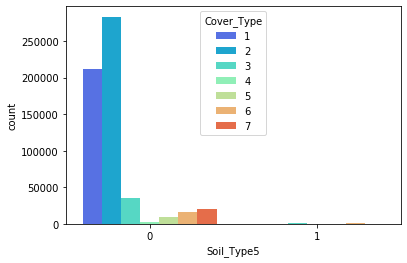

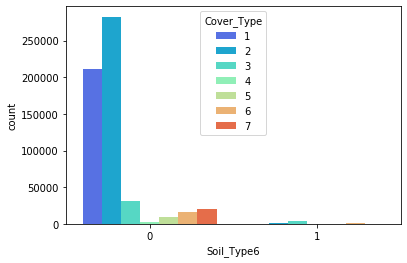

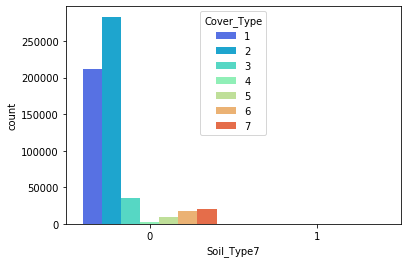

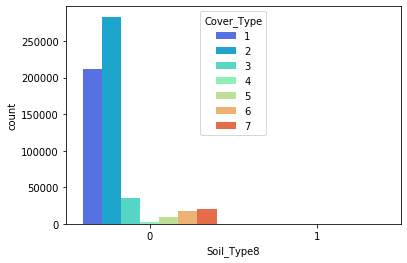

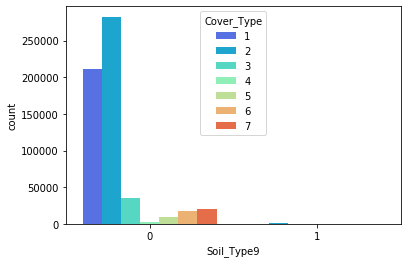

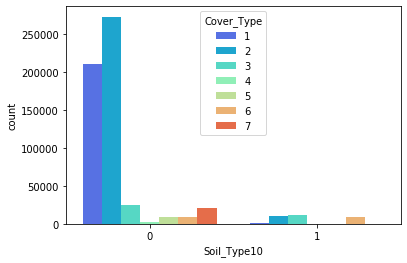

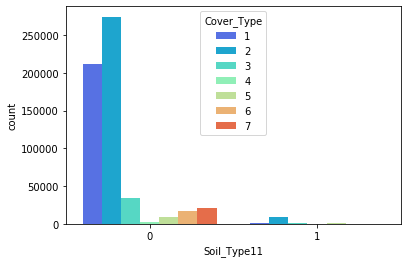

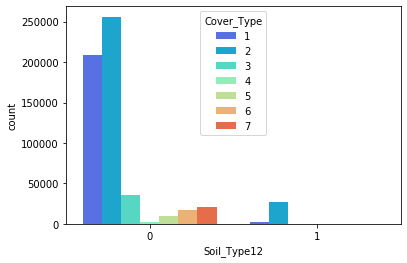

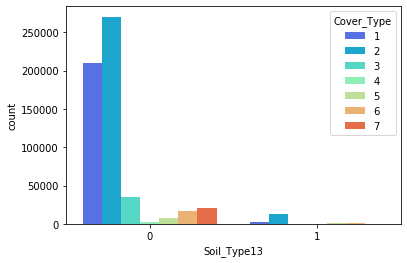

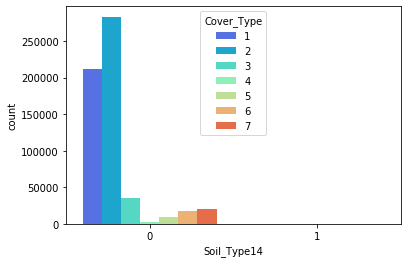

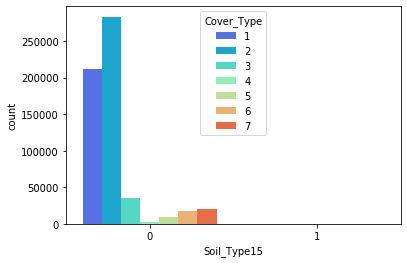

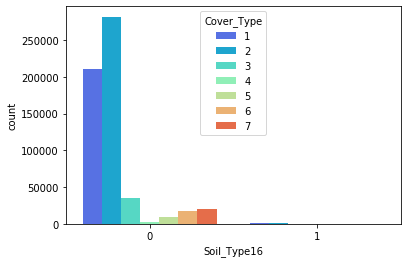

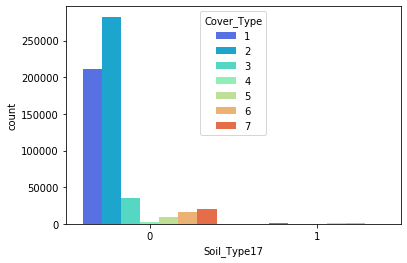

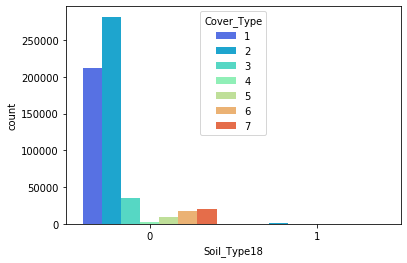

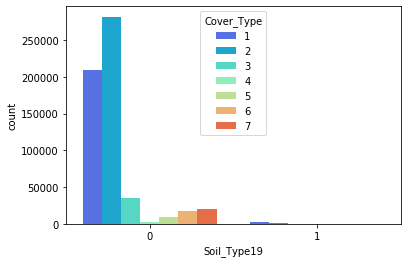

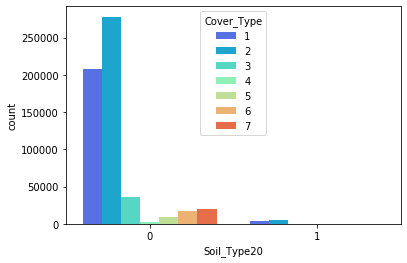

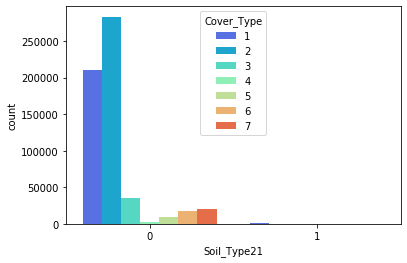

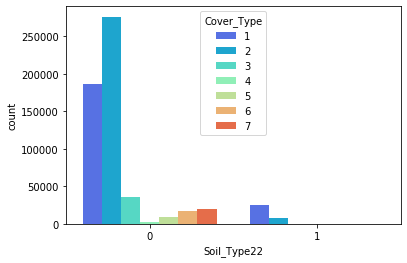

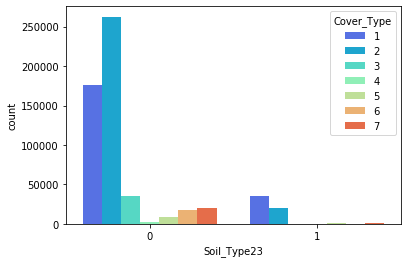

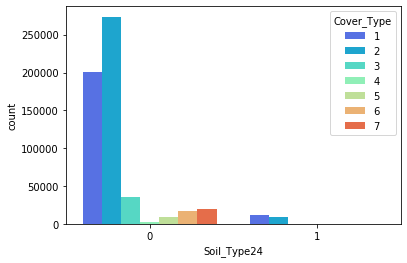

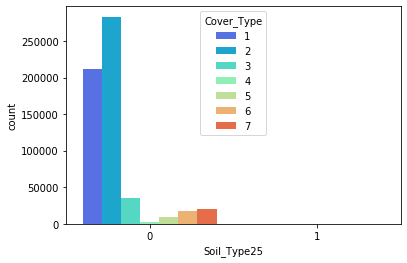

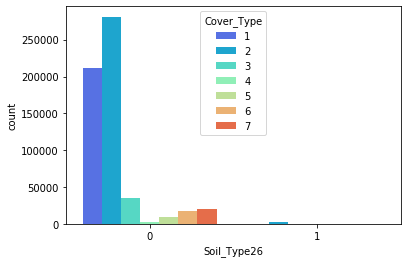

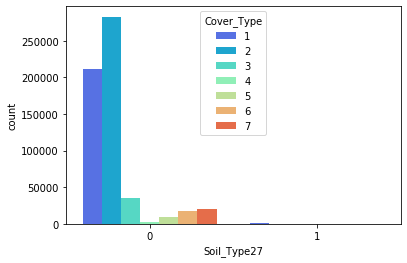

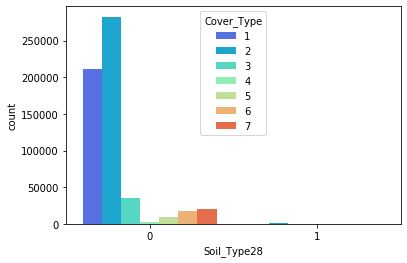

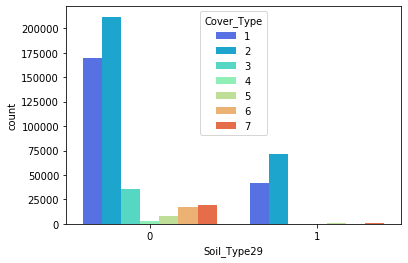

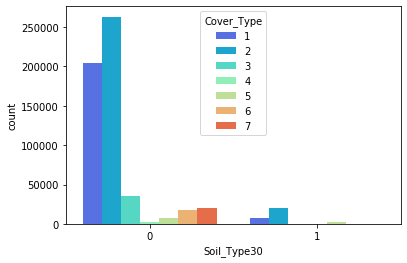

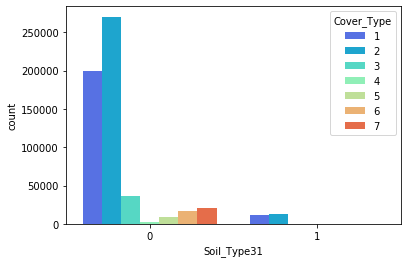

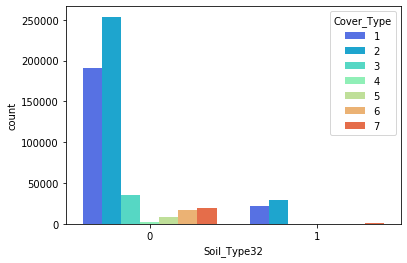

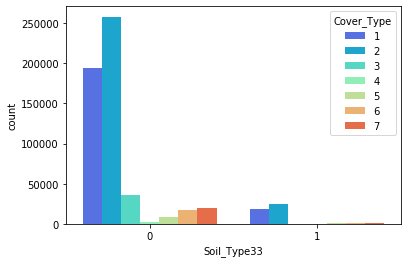

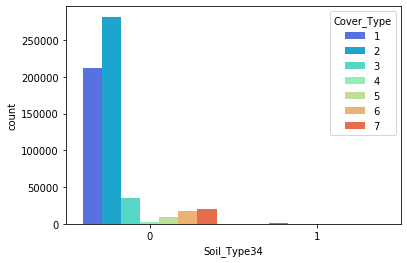

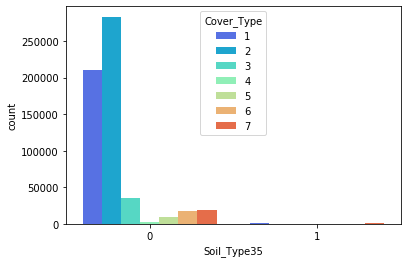

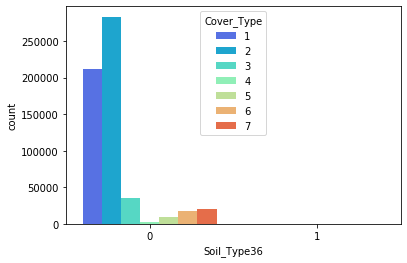

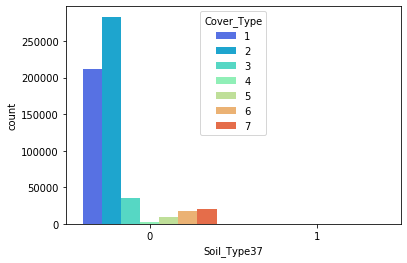

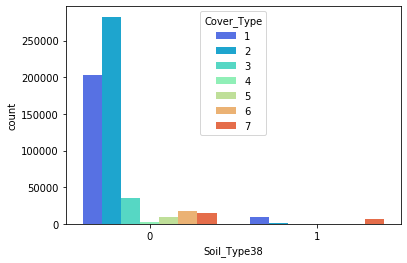

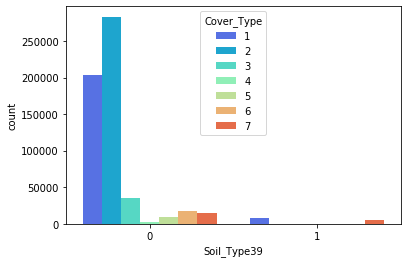

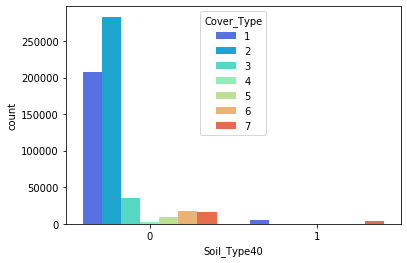

In [17]:
for i, col in enumerate(binary_data.columns):
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=col, hue=cover['Cover_Type'] ,data=cover, palette="rainbow")

### Brief Feature Engineering

One of the interesting features in the data set is 

In [18]:
cover["Distance_To_Hydrology"] = ( (cover["Horizontal_Distance_To_Hydrology"] ** 2) + 
                              (cover["Vertical_Distance_To_Hydrology"] ** 2) ) ** (0.5) # do Pythagorean on Hydrology

In [19]:
cover.drop(["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology"], axis=1, inplace=True) # Drop cols

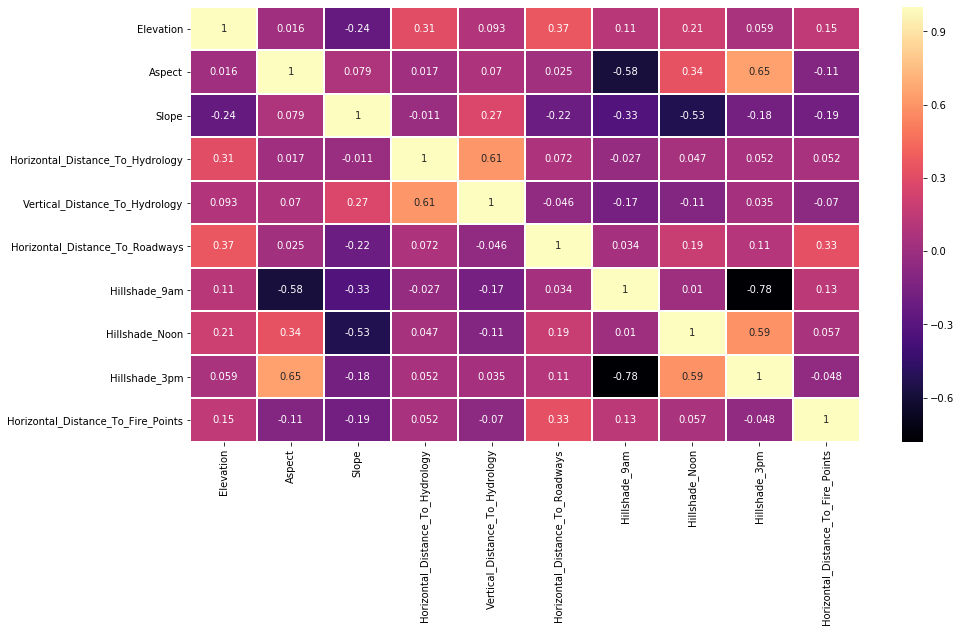

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

In [21]:
cover.drop(["Hillshade_3pm","Hillshade_9am", "Aspect"], axis=1, inplace=True) # Drop colinear columns

## Step 4: Fitting to Model and Model Validation

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, 
                             classification_report, plot_confusion_matrix)

### Step 4.1: Train/Test Split

In [23]:
np.set_printoptions(precision=2) # Set precision for the upcoming confusion matrices

In [24]:
# Get a feature names array going for future graphical listings
feature_names = cover.columns.tolist()
feature_names.remove('Cover_Type')
feature_names = np.array(feature_names)

In [25]:
y = cover.Cover_Type # target variable

In [26]:
X = cover.drop('Cover_Type', axis=1) # features variable

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, random_state=123) # Standard test/train split

### Step 4.2: Logisitic Regression Classifier

In [28]:
log_clf = LogisticRegression(C=0.01, random_state=123, solver='liblinear', max_iter = 200)
log_model = log_clf.fit(X_train, y_train)

In [29]:
coefs = np.abs(log_clf.coef_[0])
indices = np.argsort(coefs)[::-1]

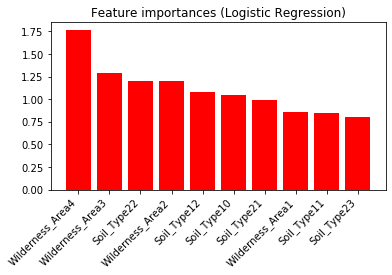

In [30]:
plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), feature_names[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

### Step 4.3: Random Forest Classifier

In [31]:
forest_clf = RandomForestClassifier()
forest_model = forest_clf.fit(X_train, y_train)

In [32]:
coefs = forest_clf.feature_importances_
indices = np.argsort(coefs)[::-1]

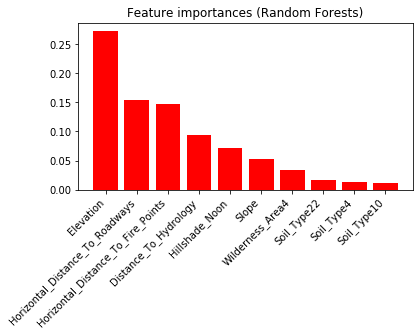

In [33]:
plt.figure()
plt.title("Feature importances (Random Forests)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), feature_names[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

### Step 4.4: K-Nearest Neighbors Classifier

In [34]:
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

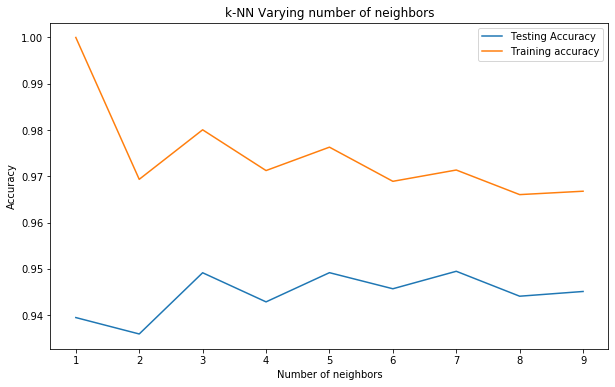

In [35]:
plt.figure(figsize=(10,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [36]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_clf.fit(X_train,y_train)

## Step 5: Model Validation

### Step 5.1: Logistic Regression Validation

Confusion matrix, without normalization
[[28278 13677    35     0     0     0   343]
 [ 9779 45553  1299     0     0    63    38]
 [    4   854  6051    35     0   114     0]
 [    0     0   477    85     0    33     0]
 [   57  1645   173     0     0     0     0]
 [    0  1333  2035     6     0   129     0]
 [ 2952    83    18     0     0     0  1054]]
Normalized confusion matrix
[[6.68e-01 3.23e-01 8.27e-04 0.00e+00 0.00e+00 0.00e+00 8.10e-03]
 [1.72e-01 8.03e-01 2.29e-02 0.00e+00 0.00e+00 1.11e-03 6.70e-04]
 [5.67e-04 1.21e-01 8.57e-01 4.96e-03 0.00e+00 1.62e-02 0.00e+00]
 [0.00e+00 0.00e+00 8.02e-01 1.43e-01 0.00e+00 5.55e-02 0.00e+00]
 [3.04e-02 8.77e-01 9.23e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 3.81e-01 5.81e-01 1.71e-03 0.00e+00 3.68e-02 0.00e+00]
 [7.19e-01 2.02e-02 4.38e-03 0.00e+00 0.00e+00 0.00e+00 2.57e-01]]


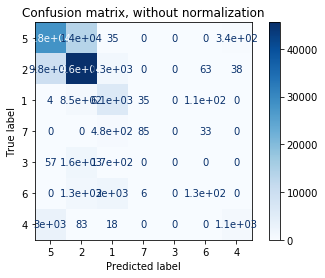

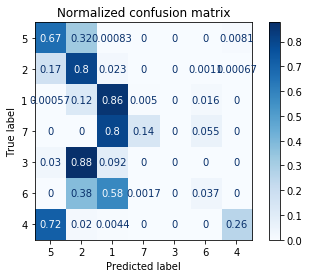

In [37]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(log_clf, X_test, y_test,
                                 display_labels=y.unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [38]:
log_training_preds = log_clf.predict(X_train)
log_training_accuracy = accuracy_score(y_train, log_training_preds)

log_val_preds = log_clf.predict(X_test) # y_hat
log_val_accuracy = accuracy_score(y_test, log_val_preds)

print('Logistic Regression Training accuracy: {:.4}%'.format(log_training_accuracy*100) )
print('Logistic Regression Testing accuracy: {:.4}%'.format(log_val_accuracy*100) )

Logistic Regression Training accuracy: 69.92%
Logistic Regression Testing accuracy: 69.83%


In [39]:
print(classification_report(y_test, log_val_preds))

              precision    recall  f1-score   support

           1       0.69      0.67      0.68     42333
           2       0.72      0.80      0.76     56732
           3       0.60      0.86      0.71      7058
           4       0.67      0.14      0.24       595
           5       0.00      0.00      0.00      1875
           6       0.38      0.04      0.07      3503
           7       0.73      0.26      0.38      4107

    accuracy                           0.70    116203
   macro avg       0.54      0.39      0.40    116203
weighted avg       0.68      0.70      0.68    116203



### Step 5.2: Random Forest Validation

Confusion matrix, without normalization
[[40210  2019     1     0    17     6    80]
 [ 1154 55308   114     1    86    54    15]
 [    1    84  6819    17     8   129     0]
 [    0     0    84   489     0    22     0]
 [   31   304    24     0  1504    11     1]
 [    5    97   205    14     3  3179     0]
 [  161    19     0     0     0     0  3927]]
Normalized confusion matrix
[[9.50e-01 4.77e-02 2.36e-05 0.00e+00 4.02e-04 1.42e-04 1.89e-03]
 [2.03e-02 9.75e-01 2.01e-03 1.76e-05 1.52e-03 9.52e-04 2.64e-04]
 [1.42e-04 1.19e-02 9.66e-01 2.41e-03 1.13e-03 1.83e-02 0.00e+00]
 [0.00e+00 0.00e+00 1.41e-01 8.22e-01 0.00e+00 3.70e-02 0.00e+00]
 [1.65e-02 1.62e-01 1.28e-02 0.00e+00 8.02e-01 5.87e-03 5.33e-04]
 [1.43e-03 2.77e-02 5.85e-02 4.00e-03 8.56e-04 9.08e-01 0.00e+00]
 [3.92e-02 4.63e-03 0.00e+00 0.00e+00 0.00e+00 0.00e+00 9.56e-01]]


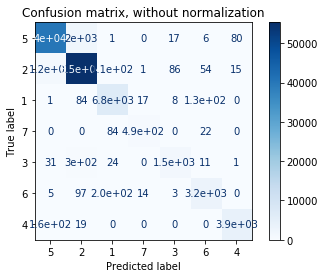

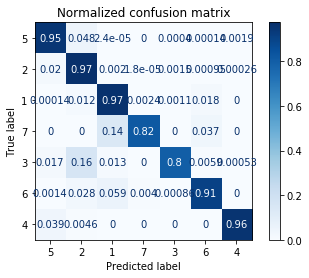

In [40]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(forest_clf, X_test, y_test,
                                 display_labels=y.unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [1]:
forest_training_preds = forest_clf.predict(X_train)
forest_training_accuracy = accuracy_score(y_train, forest_training_preds)

forest_val_preds = forest_clf.predict(X_test) # y_hat
forest_val_accuracy = accuracy_score(y_test, forest_val_preds)

print("Forest Training Accuracy: {:.4}%".format(forest_training_accuracy * 100))
print("Forest Testing accuracy: {:.4}%".format(forest_val_accuracy * 100))

NameError: name 'forest_clf' is not defined

In [42]:
print(classification_report(y_test, forest_val_preds))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96     42333
           2       0.96      0.97      0.97     56732
           3       0.94      0.97      0.95      7058
           4       0.94      0.82      0.88       595
           5       0.93      0.80      0.86      1875
           6       0.93      0.91      0.92      3503
           7       0.98      0.96      0.97      4107

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203



### Step 5.3: KNN Validation

Confusion matrix, without normalization
[[40305  1875     1     0    25     4   123]
 [ 1827 54519   136     0   153    83    14]
 [    7   199  6581    44     5   222     0]
 [    0     3   129   399     0    64     0]
 [   40   272    27     0  1530     6     0]
 [    8   151   264    18     9  3053     0]
 [  174    21     0     0     1     0  3911]]
Normalized confusion matrix
[[9.52e-01 4.43e-02 2.36e-05 0.00e+00 5.91e-04 9.45e-05 2.91e-03]
 [3.22e-02 9.61e-01 2.40e-03 0.00e+00 2.70e-03 1.46e-03 2.47e-04]
 [9.92e-04 2.82e-02 9.32e-01 6.23e-03 7.08e-04 3.15e-02 0.00e+00]
 [0.00e+00 5.04e-03 2.17e-01 6.71e-01 0.00e+00 1.08e-01 0.00e+00]
 [2.13e-02 1.45e-01 1.44e-02 0.00e+00 8.16e-01 3.20e-03 0.00e+00]
 [2.28e-03 4.31e-02 7.54e-02 5.14e-03 2.57e-03 8.72e-01 0.00e+00]
 [4.24e-02 5.11e-03 0.00e+00 0.00e+00 2.43e-04 0.00e+00 9.52e-01]]


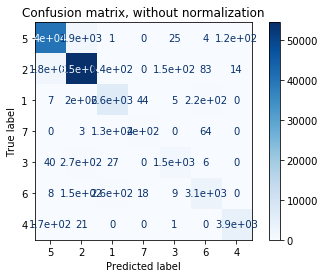

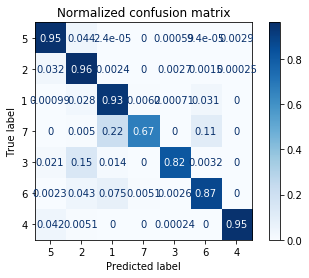

In [43]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn_clf, X_test, y_test,
                                 display_labels=y.unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [44]:
knn_training_preds = knn_clf.predict(X_train)
knn_training_accuracy = accuracy_score(y_train, knn_training_preds)

knn_val_preds = knn_clf.predict(X_test) # y_hat
knn_val_accuracy = accuracy_score(y_test, knn_val_preds)

print("KNN Training Accuracy: {:.4}%".format(knn_training_accuracy * 100))
print("KNN Testing accuracy: {:.4}%".format(knn_val_accuracy * 100))

KNN Training Accuracy: 97.63%
KNN Validation accuracy: 94.92%


In [45]:
print(classification_report(y_test, knn_val_preds))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95     42333
           2       0.96      0.96      0.96     56732
           3       0.92      0.93      0.93      7058
           4       0.87      0.67      0.76       595
           5       0.89      0.82      0.85      1875
           6       0.89      0.87      0.88      3503
           7       0.97      0.95      0.96      4107

    accuracy                           0.95    116203
   macro avg       0.92      0.88      0.90    116203
weighted avg       0.95      0.95      0.95    116203



## Summary

**The best model for cover classification:** Random Forest

The model was able to best predict forest cover type with 95% accuracy, and had precision and recall all above 80%.

K-Nearest Neighbors seemed to perform better in recall but not in precision. 

## Conclusions

I found that the three most important factors to determining cover type, when we classify with a Random Forest
Classifier are: 1) Elevation, 2) Distance to Roadways, and 3) Distance to fire points. These makes sense as the distance to fire points 
will ultimately determine the soil type that develops there and the other flora and fauna that can flourish in and around the environ-
ment to support the cover type. In addition, certain tree cover will be better suited to survive near roadways and at certain elevations.

## Future Directions

- **Class imbalance**: One of the biggest features of this dataset is class imbalance. Specifically, the classes of the target variable `Cover_Type` that are over-represented in the data are cover types 1 and 2, or Spruce/Fir and Lodgepole Pine are the most common target classes in this dataset. Working on some way of reducing the disparity, either by doing a _cost sensitive classifier_ if there's no way of resampling the data, or using some sort of synthetic sampling technique like SMOTE might help.
- **Applying SVM**: Although it appears that Random Forest is a great way to predict what cover type exists, it would be interesting to see how a "one vs one" or even a "one vs all" multi-clas classifier would work in this situation. Thus, applying SVM would be an interesting way of bringing in new classification technology to the project.
- **Feature Engineering**: most of the data contains "vertical" or "horizontal distances to certain points, but we know from experience that the Earth lies on certain curvatures that don't make just pure vertical and horizontal distances accurate. Therefore, going back and making Euclidian distances of each feature would be useful. 
- **Protecting against possible overfitting**: I have a high suspicion that my current model is overfit. Performing cross-validation is highly desirable.